In [27]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Tutorial 1: Barras, barras apiladas y puntos

In [6]:
df = sns.load_dataset(name='tips')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Text(0, 0.5, 'Propina promedio')

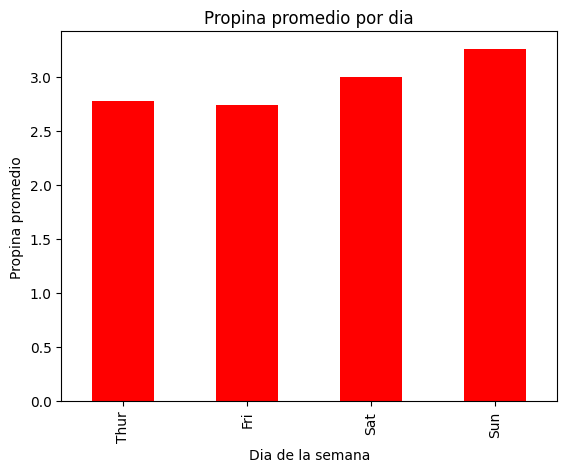

In [9]:
tip_por_dia = df.groupby('day', observed=True)['tip'].mean()
ax = tip_por_dia.plot.bar(color='red', title='Propina promedio por dia')
ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Propina promedio')

In [11]:
MH_por_dia = df.groupby(['day', 'sex'], observed=True)['tip'].count()
print(MH_por_dia)

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64


Text(0, 0.5, 'Cantidad de mesas')

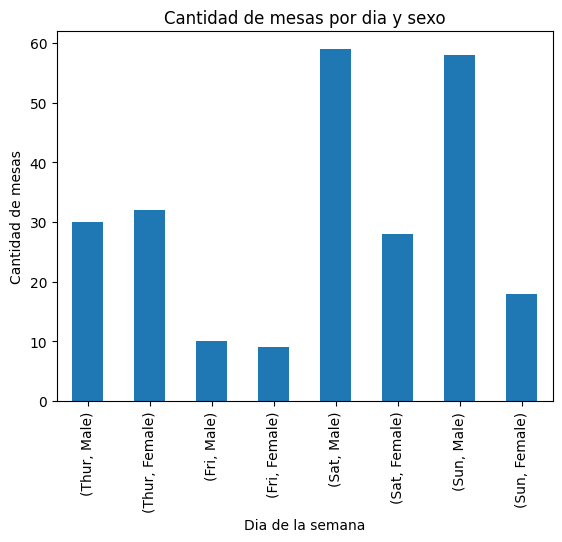

In [12]:
ax = MH_por_dia.plot.bar(stacked=True, title='Cantidad de mesas por dia y sexo')
ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Cantidad de mesas')

In [13]:
wide_MH_por_dia = MH_por_dia.unstack(level=-1)

Text(0, 0.5, 'Cantidad de mesas')

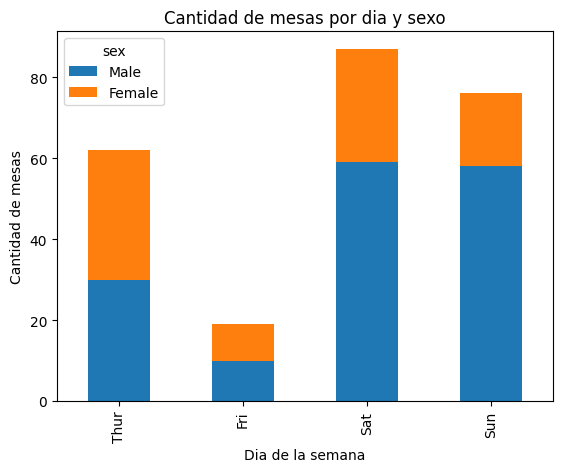

In [14]:
ax = wide_MH_por_dia.plot.bar(stacked=True, title='Cantidad de mesas por dia y sexo')
ax.set_xlabel('Dia de la semana')
ax.set_ylabel('Cantidad de mesas')

In [15]:
fmri = sns.load_dataset('fmri')
len(fmri)

1064

In [16]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [18]:
subject13 = fmri.loc[(fmri['subject']=='s13') & (fmri['event']=='cue') & (fmri['region']=='frontal')].sort_values(by='timepoint')

In [19]:
subject13

,subject,timepoint,event,region,signal
625,s13,0,cue,frontal,-0.012576
995,s13,1,cue,frontal,-0.010346
981,s13,2,cue,frontal,0.004396
651,s13,3,cue,frontal,0.034135
637,s13,4,cue,frontal,0.058704
605,s13,5,cue,frontal,0.056731
659,s13,6,cue,frontal,0.022420
1060,s13,7,cue,frontal,-0.029130
1029,s13,8,cue,frontal,-0.070991
1016,s13,9,cue,frontal,-0.082955


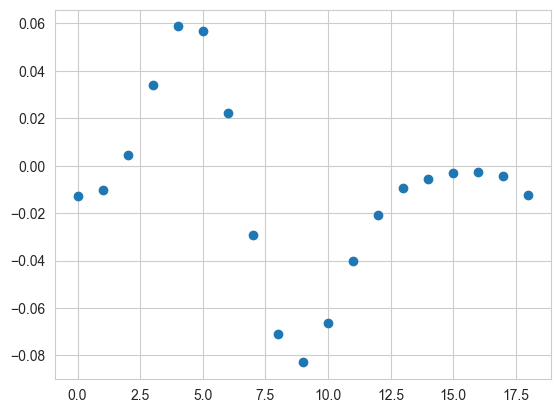

In [21]:
sns.set_style('whitegrid')
plt.plot(subject13['timepoint'], subject13['signal'], marker='o', linestyle='')
plt.show()

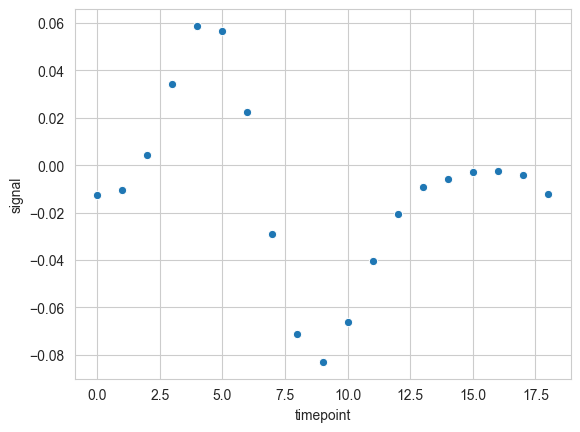

In [22]:
ax = sns.lineplot(x='timepoint', y='signal', data=subject13, linewidth=0, marker='o')

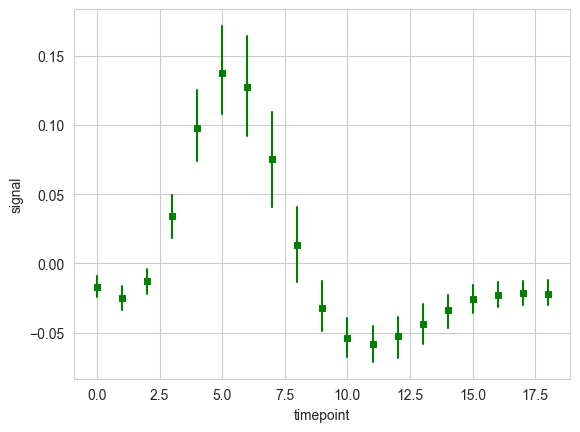

In [25]:
ax = sns.lineplot(data=fmri, x='timepoint', y='signal', linewidth=0, marker='s', err_style='bars', color='green')

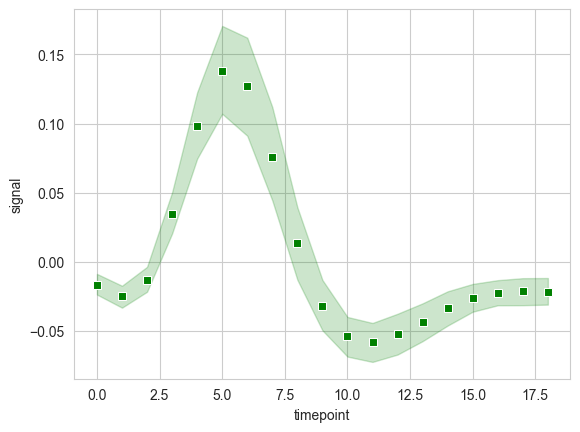

In [26]:
ax = sns.lineplot(data=fmri, x='timepoint', y='signal', linewidth=0, marker='s', err_style='band', color='green')

# Tutorial 2: Dispersión, burbujas y flujos


In [28]:
tips = sns.load_dataset(name='tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


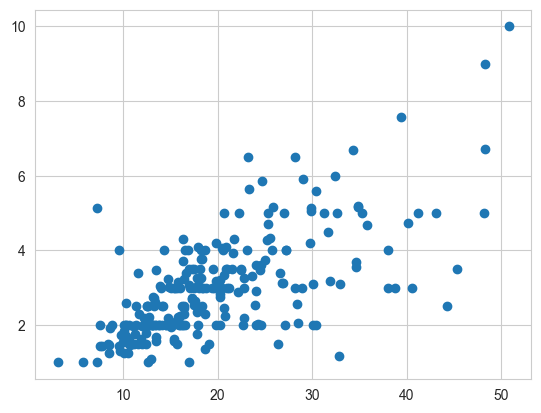

In [29]:
plt.scatter(tips['total_bill'], tips['tip'])

Text(0, 0.5, 'tip')

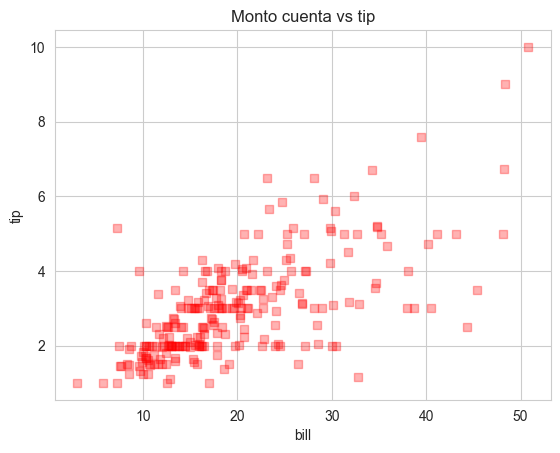

In [30]:
plt.scatter(tips['total_bill'], tips['tip'], color='red', alpha=0.3, marker='s')
plt.title('Monto cuenta vs tip')
plt.xlabel('bill')
plt.ylabel('tip')

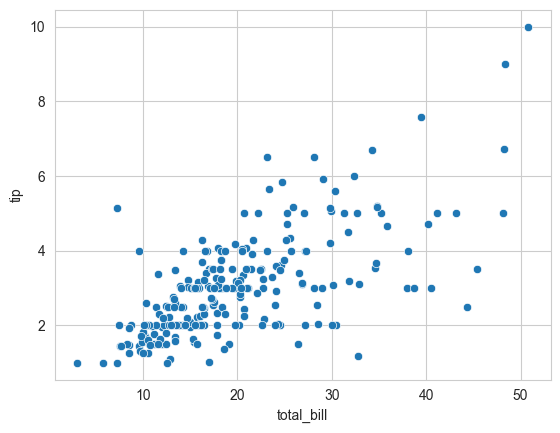

In [31]:
ax = sns.scatterplot(x='total_bill', y='tip', data=tips)

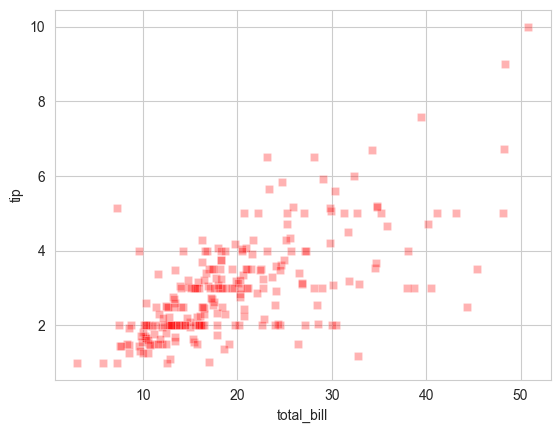

In [32]:
ax = sns.scatterplot(x='total_bill', y='tip', data=tips, color='red', marker='s', alpha=0.3)

In [33]:
smoker_num = tips['smoker'].astype('category').cat.codes
time_num = tips['time'].astype('category').cat.codes

Text(0, 0.5, 'Propina')

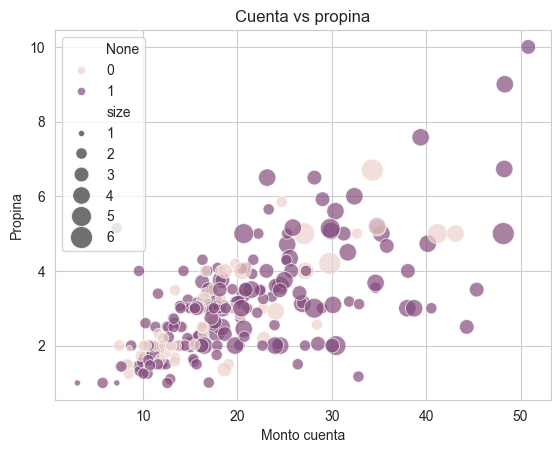

In [36]:
ax = sns.scatterplot(
    x='total_bill',
    y='tip',
    hue=time_num,
    size='size',
    sizes=(20, 250),
    hue_norm=(0, 1.5),
    alpha=0.7,
    legend='full',
    data=tips)
ax.set_title('Cuenta vs propina')
ax.set_xlabel('Monto cuenta')
ax.set_ylabel('Propina')

In [37]:
#pip install altair vega_datasets

   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/731.2 kB 1.3 MB/s eta 0:00:01
   --- ----------------------------------- 61.4/731.2 kB 648.1 kB/s eta 0:00:02
   ----- -------------------------------- 112.6/731.2 kB 819.2 kB/s eta 0:00:01
   ------------ --------------------------- 225.3/731.2 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 235.5/731.2 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 368.6/731.2 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 532.5/731.2 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 696.3/731.2 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 731.2/731.2 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/210.8 kB ? eta -:--:--
   ---------------------------------- ----- 184.3/210.8 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 210.8/210.8 kB 


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import altair as alt

In [39]:
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [41]:
from vega_datasets import data

In [44]:
data.obesity()

,id,rate,state
0,1,0.187,AL
1,2,0.198,AK
2,4,0.133,AZ
3,5,0.175,AR
4,6,0.151,CA
5,8,0.100,CO
6,9,0.125,CT
7,10,0.171,DE
8,12,0.172,FL
9,13,0.133,GA
